<a href="https://colab.research.google.com/github/amirabbasgashtil/data-mining-course/blob/main/decision_tree/decision_tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## reading dataset

In [2]:
from google.colab import files
import pandas as pd

files.upload()
titanic = pd.read_csv("Titanic.csv")

Saving Titanic.csv to Titanic.csv


In [3]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Data Preparation

In [7]:
# how many NaNs we have

for title in titanic.columns:
  print(f"{title} -> {sum(titanic[title].isna())} NaNs")

PassengerId -> 0 NaNs
Survived -> 0 NaNs
Pclass -> 0 NaNs
Name -> 0 NaNs
Sex -> 0 NaNs
Age -> 177 NaNs
SibSp -> 0 NaNs
Parch -> 0 NaNs
Ticket -> 0 NaNs
Fare -> 0 NaNs
Cabin -> 687 NaNs
Embarked -> 2 NaNs


In [25]:
# handling NaNs in Age column

avg = titanic['Age'].mean()
titanic['Age'].fillna(avg, inplace=True)
print(sum(titanic["Age"].isna()))


# handling NaNs in Cabin column
titanic.drop('Cabin', axis=1, inplace=True)

# handling NaNs in Embarked column

titanic.dropna(subset=['Embarked'], axis=0, inplace=True)
print(sum(titanic["Embarked"].isna()))

0
0


<ipython-input-25-8e36ab501aad>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic['Age'].fillna(avg, inplace=True)


## let's see how many NaNs we have again

In [26]:
# how many NaNs we have

for title in titanic.columns:
  print(f"{title} -> {sum(titanic[title].isna())} NaNs")

PassengerId -> 0 NaNs
Survived -> 0 NaNs
Pclass -> 0 NaNs
Name -> 0 NaNs
Sex -> 0 NaNs
Age -> 0 NaNs
SibSp -> 0 NaNs
Parch -> 0 NaNs
Ticket -> 0 NaNs
Fare -> 0 NaNs
Embarked -> 0 NaNs


## encoding

name column is not important for us in this task

In [30]:
titanic.drop(['Name'], axis=1, inplace=True)
titanic.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,female,35.0,1,0,113803,53.1000,S
4,5,0,3,male,35.0,0,0,373450,8.0500,S


In [31]:
from sklearn.preprocessing import LabelEncoder

enc = LabelEncoder()
columns = ['Sex', 'Ticket', 'Embarked']

for col in columns:
    enc.fit(titanic[col])
    titanic[col] = enc.transform(titanic[col])

titanic.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,1,22.0,1,0,522,7.2500,2
1,2,1,1,0,38.0,1,0,595,71.2833,0
2,3,1,3,0,26.0,0,0,668,7.9250,2
3,4,1,1,0,35.0,1,0,48,53.1000,2
4,5,0,3,1,35.0,0,0,471,8.0500,2


## split dataset into test and train

In [32]:
target = titanic['Survived']
data = titanic.drop('Survived',axis=1)

In [33]:
target.head()

,Survived
0,0
1,1
2,1
3,1
4,0


In [35]:
data.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,3,1,22.0,1,0,522,7.2500,2
1,2,1,0,38.0,1,0,595,71.2833,0
2,3,3,0,26.0,0,0,668,7.9250,2
3,4,1,0,35.0,1,0,48,53.1000,2
4,5,3,1,35.0,0,0,471,8.0500,2


In [36]:
from sklearn.model_selection import train_test_split

data_train, data_test, target_train, target_test = train_test_split(data, target, train_size=0.8)

## gini impurity

In [87]:
def gini_impurity(left, right):

    left_size = len(left)
    right_size = len(right)
    total_size = left_size + right_size

    if total_size == 0:
        return 0

    left_impurity = 1 - sum((np.sum(left == c) / left_size) ** 2 for c in np.unique(left))

    right_impurity = 1 - sum((np.sum(right == c) / right_size) ** 2 for c in np.unique(right))

    impurity = (left_size / total_size) * left_impurity + (right_size / total_size) * right_impurity
    return impurity


## entropy

In [99]:
def entropy(left, right):
    def calc_entropy(y):
        _, counts = np.unique(y, return_counts=True)
        probabilities = counts / len(y)
        return -np.sum(probabilities * np.log2(probabilities + 1e-9))

    left_entropy = calc_entropy(left)
    right_entropy = calc_entropy(right)

    total_size = len(left) + len(right)


    return (len(left) / total_size) * left_entropy + (len(right) / total_size) * right_entropy




## weighted impurity

In [100]:
def weighted_impurity(left, right, impurity_func):
  total = len(left) + len(right)
  return (len(left) / total) * impurity_func(left) + (len(right) / total) * impurity_func(right)

## best split

In [104]:
def best_split(X, y, impurity_func):
    n_samples, n_features = X.shape
    best_impurity = float("inf")
    best_feature = None
    best_threshold = None

    for feature in range(n_features):
        feature_name = X.columns[feature]  # نام ستون را می‌گیریم
        thresholds = np.unique(X[feature_name])  # استفاده از نام ستون به‌جای ایندکس عددی
        for threshold in thresholds:
            left_indices = X[feature_name] <= threshold
            right_indices = X[feature_name] > threshold

            if len(y[left_indices]) == 0 or len(y[right_indices]) == 0:
                continue

            impurity = impurity_func(y[left_indices], y[right_indices])  # ارسال دو آرگومان
            if impurity < best_impurity:
                best_impurity = impurity
                best_feature = feature_name  # ذخیره نام ستون
                best_threshold = threshold

    return {"feature": best_feature, "threshold": best_threshold}


In [122]:
def build_tree_gini(X, y, max_depth, depth=0):
    if depth >= max_depth or len(set(y)) == 1:
        return np.bincount(y).argmax()


    split = best_split(X, y, gini_impurity)
    feature = split["feature"]
    threshold = split["threshold"]

    left_indices = X[feature] <= threshold
    right_indices = X[feature] > threshold

    left_tree = build_tree_gini(X[left_indices], y[left_indices], max_depth, depth + 1)
    right_tree = build_tree_gini(X[right_indices], y[right_indices], max_depth, depth + 1)

    return {
        "feature": feature,
        "threshold": threshold,
        "left": left_tree,
        "right": right_tree,
    }



def build_tree_entropy(X, y, max_depth, depth=0):
    if depth >= max_depth or len(set(y)) == 1:
        return np.bincount(y).argmax()


    split = best_split(X, y, entropy)
    feature = split["feature"]
    threshold = split["threshold"]

    left_indices = X[feature] <= threshold
    right_indices = X[feature] > threshold

    left_tree = build_tree_entropy(X[left_indices], y[left_indices], max_depth, depth + 1)
    right_tree = build_tree_entropy(X[right_indices], y[right_indices], max_depth, depth + 1)

    return {
        "feature": feature,
        "threshold": threshold,
        "left": left_tree,
        "right": right_tree,
    }

def predict_single(x, tree):
    while isinstance(tree, dict):  # Traverse until reaching a leaf
        feature, threshold = tree["feature"], tree["threshold"]

        # x is a pandas Series (one row from the DataFrame)
        feature_value = x[feature]  # Accessing the feature by name (since x is a Series)

        if feature_value <= threshold:
            tree = tree["left"]
        else:
            tree = tree["right"]

    return tree

def predict(X, tree):
    # Here, X is a DataFrame, and we iterate over its rows
    return [predict_single(x, tree) for _, x in X.iterrows()]  # x is a pandas Series for each row


## building 2 tree

In [113]:
first_tree = build_tree_gini(data_train, target_train, 10)
second_tree = build_tree_entropy(data_train, target_train, 10)

In [114]:
first_tree

{'feature': 'Sex',
 'threshold': 0,
 'left': {'feature': 'Pclass',
  'threshold': 2,
  'left': {'feature': 'Age',
   'threshold': 2.0,
   'left': {'feature': 'PassengerId', 'threshold': 298, 'left': 0, 'right': 1},
   'right': {'feature': 'Fare',
    'threshold': 28.7125,
    'left': {'feature': 'Fare',
     'threshold': 27.75,
     'left': {'feature': 'PassengerId',
      'threshold': 42,
      'left': {'feature': 'PassengerId',
       'threshold': 12,
       'left': 1,
       'right': 0},
      'right': {'feature': 'Age',
       'threshold': 54.0,
       'left': {'feature': 'PassengerId',
        'threshold': 358,
        'left': {'feature': 'PassengerId',
         'threshold': 347,
         'left': {'feature': 'PassengerId',
          'threshold': 195,
          'left': 1,
          'right': 1},
         'right': 0},
        'right': 1},
       'right': 0}},
     'right': 0},
    'right': {'feature': 'Ticket',
     'threshold': 36,
     'left': {'feature': 'Ticket',
      'threshold

In [115]:
second_tree

{'feature': 'Sex',
 'threshold': 0,
 'left': {'feature': 'Pclass',
  'threshold': 2,
  'left': {'feature': 'PassengerId',
   'threshold': 358,
   'left': {'feature': 'PassengerId',
    'threshold': 347,
    'left': {'feature': 'Age',
     'threshold': 2.0,
     'left': 0,
     'right': {'feature': 'Fare',
      'threshold': 28.7125,
      'left': {'feature': 'Fare',
       'threshold': 27.75,
       'left': {'feature': 'Age',
        'threshold': 27.0,
        'left': {'feature': 'Age',
         'threshold': 24.0,
         'left': {'feature': 'Age', 'threshold': 21.0, 'left': 1, 'right': 1},
         'right': 0},
        'right': 1},
       'right': 0},
      'right': 1}},
    'right': 0},
   'right': {'feature': 'Age',
    'threshold': 56.0,
    'left': {'feature': 'Ticket',
     'threshold': 36,
     'left': {'feature': 'PassengerId',
      'threshold': 499,
      'left': {'feature': 'PassengerId',
       'threshold': 436,
       'left': 1,
       'right': 0},
      'right': 1},
    

## prediction

In [123]:
y_pred_gini = predict(data_test, first_tree)
y_pred_entropy = predict(data_test, second_tree)

In [137]:
from sklearn.metrics import f1_score, confusion_matrix


y_pred_gini = predict(data_test, first_tree)
y_pred_entropy = predict(data_test, second_tree)

# Calculate the F1 score for both models
f1_gini = f1_score(target_test, y_pred_gini)
f1_entropy = f1_score(target_test, y_pred_entropy)

# Calculate the confusion matrix for both models
conf_matrix_gini = confusion_matrix(target_test, y_pred_gini)
conf_matrix_entropy = confusion_matrix(target_test, y_pred_entropy)

# Display the results
print("F1 Score (Gini):", f1_gini)
print("Confusion Matrix (Gini):\n", conf_matrix_gini)

print("\nF1 Score (Entropy):", f1_entropy)
print("Confusion Matrix (Entropy):\n", conf_matrix_entropy)


F1 Score (Gini): 0.7333333333333333
Confusion Matrix (Gini):
 [[102  11]
 [ 21  44]]

F1 Score (Entropy): 0.7288135593220338
Confusion Matrix (Entropy):
 [[103  10]
 [ 22  43]]


## which max_depth

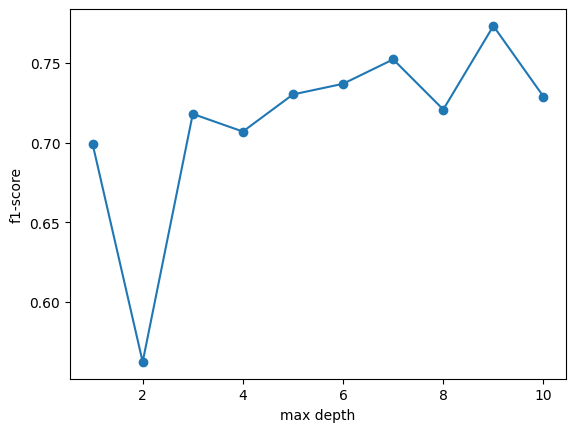

In [138]:
import matplotlib.pyplot as plt

depth = []
score = []

for max_depth in range(1, 11):
  tree = build_tree_entropy(data_train, target_train, max_depth)
  pred = predict(data_test, tree)
  score_ = f1_score(target_test, pred)
  depth.append(max_depth)
  score.append(score_)



plt.plot(depth, score, marker='o')
plt.xlabel('max depth')
plt.ylabel('f1-score')
plt.show()